### Importing the Important Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
img=cv.imread('/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset/PinkBollworm/Bollworm-cotton-COVER.jpg')
img.shape

(800, 1200, 3)

# 2. Data Preprocessing

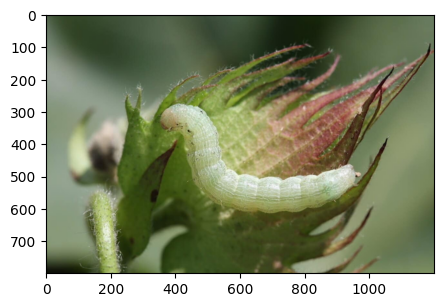

In [ ]:
#Sample images
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

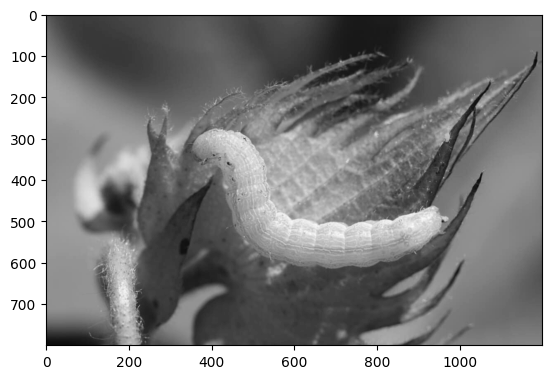

In [ ]:
# Convert this image into Gray Scale
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

In [ ]:
path_to_data = "/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset"


## 3.1 Getting the correct formate images

In [ ]:
import tensorflow as tf
import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import cv2
import imghdr
import os

In [ ]:
data_dir="/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset"

In [ ]:
os.listdir(os.path.join(data_dir,'PinkBollworm'))

['Bollworm.jpg',
 'image9.jpeg',
 'image21.jpeg',
 'image19.jpeg',
 'image8.jpeg',
 'image7.jpeg',
 'image22.jpeg',
 'image3.jpeg',
 'image5.jpeg',
 'image23.jpeg',
 'image17.jpeg',
 'image16.jpeg',
 'image13.jpeg',
 'pink-bollworm-cotton-1559816107.jpg',
 'image24.jpeg',
 'Pink20BollWorm.png',
 'images.jpg',
 'image27.jpeg',
 'Bollworm-on-cotton-square-0526.jpg',
 'Bollworm-damage-bloom.jpg',
 'crop_prot_crop_insectpest20_cotton_clip_image004.jpg',
 'Bollworm-Larvae-5294.jpg',
 'pinkworm.jpg',
 'Pink20bollworm20-20Damage.jpg',
 'crop_prot_crop_insectpest20_cotton_clip_image008.jpg',
 'pink-bollworm-pectinophora-gossypiella-caterpillar-in-a-damaged-cotton-AXRKKD.jpg',
 'Fall-Armyworn-larvae-1.jpg',
 'product-5f97f2623f245-60.jpg',
 'Bollworm-larvae.jpg',
 'Bollworm-Medium-larvae-0162.jpg',
 'Bollworm-damaged-boll.jpg',
 'images15.jpg',
 'images11.jpg',
 '5006025.jpg',
 'images16.jpg',
 'images33.jpg',
 'images26.jpg',
 'images27.jpg',
 'images40.jpg',
 'images42.jpg',
 'images53.jpg',


## 3.2 Remove wrong formated images

In [ ]:
image_ext = ['jpeg', 'jpg', 'bmp','png']
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_ext:
        print("Image is not in the ext {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

Image is not in the ext /content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset/curl_virus/curl314.gif
Image is not in the ext /content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset/Healthy/h420.webp


In [ ]:
#Loading data by using keras.utils
#Pipline
data=keras.utils.image_dataset_from_directory(data_dir)

Found 6585 files belonging to 9 classes.


In [ ]:
#Access the pipline
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

In [ ]:
batch

(array([[[[255.       , 254.21484  , 254.80362  ],
          [253.41727  , 255.       , 251.45383  ],
          [250.96979  , 255.       , 250.75104  ],
          ...,
          [251.43874  , 255.       , 251.43997  ],
          [252.95012  , 255.       , 247.20703  ],
          [254.78516  , 254.57368  , 254.50905  ]],
 
         [[255.       , 255.       , 250.27414  ],
          [213.8175   , 216.01341  , 201.0041   ],
          [139.44862  , 146.72127  , 125.44803  ],
          ...,
          [180.7322   , 196.72028  , 148.84488  ],
          [178.04868  , 190.76591  , 153.54327  ],
          [252.41637  , 255.       , 247.02484  ]],
 
         [[255.       , 255.       , 244.74342  ],
          [177.9281   , 180.84938  , 158.72147  ],
          [ 49.713913 ,  58.903687 ,  27.63124  ],
          ...,
          [138.13899  , 167.56186  ,  81.66016  ],
          [139.55078  , 161.24179  ,  98.5621   ],
          [250.08594  , 255.       , 240.66406  ]],
 
         ...,
 
         [[2

In [ ]:
len(batch)

2

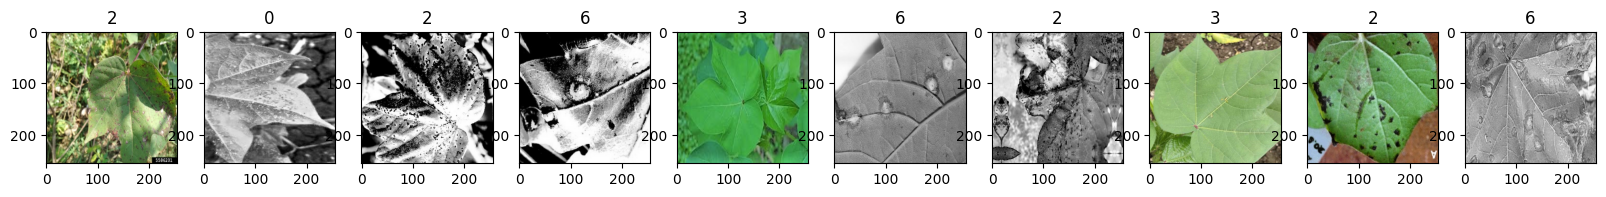

In [ ]:
fit,ax=plt.subplots(ncols=10,figsize=(20,20))
for idx,img in enumerate(batch[0][:10]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 3.3 Data Scaling

In [ ]:
#Scale the data
print(batch[0].max())
scale_data=batch[0]/255
print(scale_data.max())

255.0
1.0


In [ ]:
#Through Pipline
data=data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
scaled_iterator.next()[1].max(
)

7

## 3.4 Spliting the data

In [ ]:
len(data)

206

In [ ]:
train_data=int(len(data)*.7)
val_data=int(len(data)*.2)
test_data=int(len(data)*.1)+1

In [ ]:
test_data+val_data+train_data

206

In [ ]:
train=data.take(train_data)
val=data.skip(train_data).take(val_data)
test=data.skip(val_data+train_data).take(test_data)

# 4 Building a model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Dropout,MaxPool2D,Flatten

In [ ]:
#!pip install -U protobuf==3.8.0

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=9,activation='softmax'))

In [ ]:
#Compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
hist=model.fit(train,validation_data=val,epochs=10)

Epoch 1/10
144/144 [==============================] - 68s 455ms/step - loss: 1.6202 - accuracy: 0.3815 - val_loss: 1.2493 - val_accuracy: 0.5358
Epoch 2/10
144/144 [==============================] - 51s 346ms/step - loss: 1.0047 - accuracy: 0.6261 - val_loss: 0.9262 - val_accuracy: 0.6745
Epoch 3/10
144/144 [==============================] - 64s 440ms/step - loss: 0.6401 - accuracy: 0.7823 - val_loss: 0.7124 - val_accuracy: 0.7683
Epoch 4/10
144/144 [==============================] - 65s 451ms/step - loss: 0.3856 - accuracy: 0.8715 - val_loss: 0.7864 - val_accuracy: 0.7683
Epoch 5/10
144/144 [==============================] - 65s 448ms/step - loss: 0.2324 - accuracy: 0.9219 - val_loss: 0.7953 - val_accuracy: 0.7942
Epoch 6/10
144/144 [==============================] - 64s 443ms/step - loss: 0.1222 - accuracy: 0.9640 - val_loss: 0.8257 - val_accuracy: 0.8216
Epoch 7/10
144/144 [==============================] - 64s 441ms/step - loss: 0.1037 - accuracy: 0.9659 - val_loss: 0.8916 - val_ac

## 4.1 Performance check

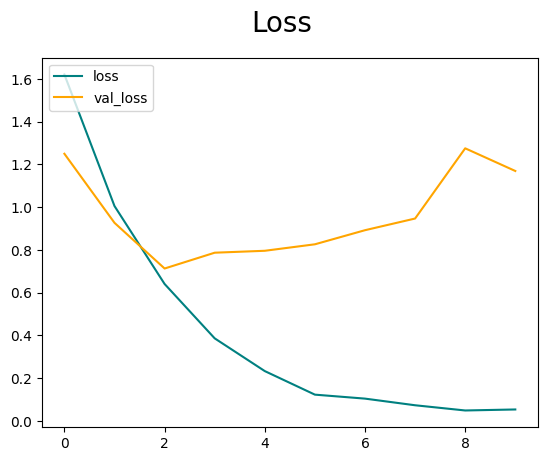

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

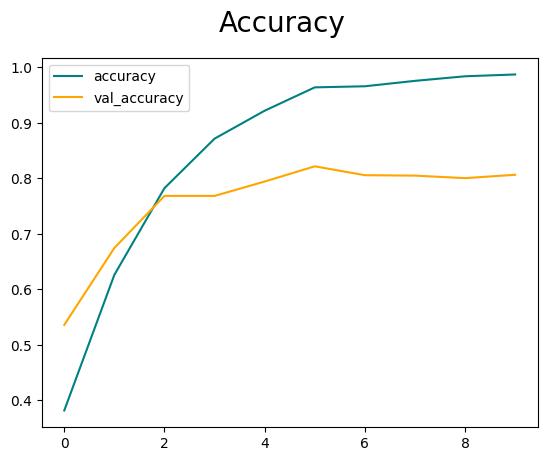

In [ ]:
#Accuracy plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4.2 Prediction

In [22]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/ASE Project/Image Classification/Cotton_Pest_Detection_Model.h5')

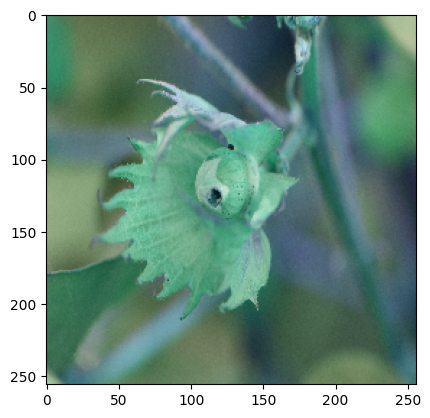

1/1 [==============================] - 0s 28ms/step


array([[6.6433927e-06, 8.4678259e-06, 1.0773408e-02, 1.7461886e-03,
        9.5758563e-01, 6.6061989e-06, 7.7826502e-07, 2.9772714e-02,
        9.9518264e-05]], dtype=float32)

In [29]:
img1=cv2.imread("/content/Bollworm-damaged-boll.jpg")
img1 = tf.image.resize(img1, (256,256))
plt.imshow(img1.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(img1/255,0))
yhat

In [30]:
if yhat[0][0]>0.5:
  print("This is Aphids")
elif yhat[0][1]>0.5:
  print("This is Army worm")
elif yhat[0][2]>0.5:
  print("This is Bacterial blight")
elif yhat[0][3]>0.5:
  print("This is Healthy")
elif yhat[0][4]>0.5:
  print("This is PinkBollworm")
elif yhat[0][5]>0.5:
  print("This is Powdery mildew")
elif yhat[0][6]>0.5:
  print("This is Target spot")
elif yhat[0][7]>0.5:
  print("This is Curl Virus")
elif yhat[0][8]>0.5:
  print("This is Fussarium Wilt")
else:
  print("Not Recognized this Picture:", "Try Again")

This is PinkBollworm


In [ ]:
!pip install joblib
import joblib
joblib.dump(model,'Cotton_Pest_Detection_Model.pkl')

['Cotton_Pest_Detection_Model.pkl']

In [ ]:
model.save('Cotton_Pest_Detection_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Using the VGG16 model

In [5]:
import pathlib

data_dir = '/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset'
print(data_dir)

/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset


In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6585 files belonging to 9 classes.
Using 5268 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6585 files belonging to 9 classes.
Using 1317 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Aphids', 'Army worm', 'Bacterial blight', 'Healthy', 'PinkBollworm', 'Powdery mildew', 'Target spot', 'curl_virus', 'fussarium_wilt']


In [9]:
from keras.api._v2.keras.applications import vgg16
vgg16_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
    classes=1000,
    classifier_activation="softmax",
)
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(9, activation='softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [10]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper (ModuleWrap  (None, 512)               0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               262656    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 9)                 4617      
 apper)                                                          
                                                                 
Total params: 14981961 (57.15 MB)
Trainable params: 267273 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
___________

In [11]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = vgg16_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
165/165 [==============================] - 1723s 10s/step - loss: 2.6468 - accuracy: 0.7849 - val_loss: 1.5734 - val_accuracy: 0.8254
Epoch 2/10
165/165 [==============================] - 32s 191ms/step - loss: 0.6517 - accuracy: 0.9064 - val_loss: 1.1019 - val_accuracy: 0.8694
Epoch 3/10
165/165 [==============================] - 38s 224ms/step - loss: 0.4077 - accuracy: 0.9311 - val_loss: 0.8622 - val_accuracy: 0.8960
Epoch 4/10
165/165 [==============================] - 32s 188ms/step - loss: 0.1997 - accuracy: 0.9607 - val_loss: 0.9387 - val_accuracy: 0.8937
Epoch 5/10
165/165 [==============================] - 37s 217ms/step - loss: 0.1356 - accuracy: 0.9683 - val_loss: 0.9108 - val_accuracy: 0.9021
Epoch 6/10
165/165 [==============================] - 32s 189ms/step - loss: 0.1056 - accuracy: 0.9776 - val_loss: 1.1049 - val_accuracy: 0.8990
Epoch 7/10
165/165 [==============================] - 37s 219ms/step - loss: 0.1449 - accuracy: 0.9700 - val_loss: 0.8625 - val_ac

# Evaluation of the Model

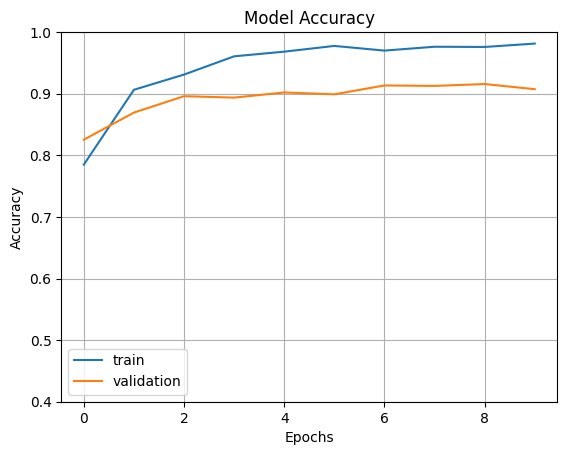

In [32]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

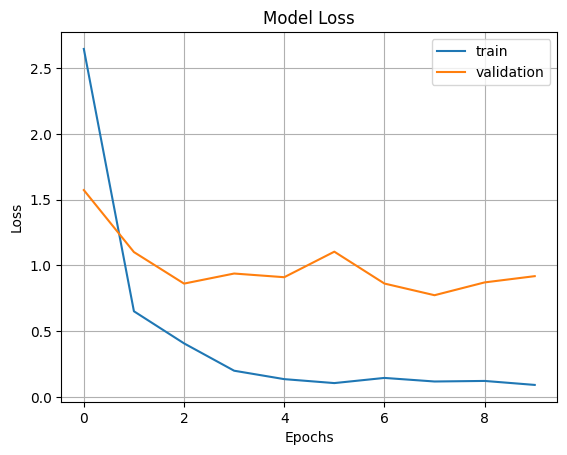

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Prediction for VGG-16

In [34]:
import cv2
image=cv2.imread('/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset/PinkBollworm/22_Pink-bollworm-larvae_Winfield-Sterling.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [35]:

pred=vgg16_model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[2.9777379e-37 4.3407497e-17 1.4968187e-25 0.0000000e+00 1.0000000e+00
  0.0000000e+00 3.8944028e-20 3.3744808e-27 4.0925145e-17]]


In [36]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is PinkBollworm


In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(vgg16_model)
tflite_model = converter.convert()

with open("VGG16_Cotton_Disease_model.tflite", 'wb') as f:
  f.write(tflite_model)

In [4]:
vgg16_model.save_weights('Resnet_model_for_Cotton_Pest.h5')

#model.save('Cotton_Pest_Detection_Model.h5')

NameError: ignored

# Training on MobileNet

In [ ]:
mobnet_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(180,180,3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    pooling='max',
    classes=1000,
    classifier_activation="softmax",
)
for layer in pretrained_model.layers:
        layer.trainable=False

mobnet_model.add(pretrained_model)
mobnet_model.add(Flatten())
mobnet_model.add(Dense(512, activation='relu'))
mobnet_model.add(Dense(9, activation='softmax'))

In [ ]:
mobnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 module_wrapper_21 (ModuleW  (None, 1280)              0         
 rapper)                                                         
                                                                 
 module_wrapper_22 (ModuleW  (None, 512)               655872    
 rapper)                                                         
                                                                 
 module_wrapper_23 (ModuleW  (None, 9)                 4617      
 rapper)                                                         
                                                                 
Total params: 2918473 (11.13 MB)
Trainable params: 660

In [ ]:
mobnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = mobnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
165/165 [==============================] - 37s 189ms/step - loss: 2.0263 - accuracy: 0.4656 - val_loss: 1.2037 - val_accuracy: 0.5543
Epoch 2/10
165/165 [==============================] - 32s 189ms/step - loss: 1.0103 - accuracy: 0.6445 - val_loss: 1.1778 - val_accuracy: 0.6310
Epoch 3/10
165/165 [==============================] - 37s 220ms/step - loss: 0.8299 - accuracy: 0.7043 - val_loss: 0.9212 - val_accuracy: 0.6712
Epoch 4/10
165/165 [==============================] - 35s 204ms/step - loss: 0.6483 - accuracy: 0.7741 - val_loss: 1.0106 - val_accuracy: 0.6507
Epoch 5/10
165/165 [==============================] - 36s 211ms/step - loss: 0.6292 - accuracy: 0.7754 - val_loss: 0.8125 - val_accuracy: 0.7267
Epoch 6/10
165/165 [==============================] - 38s 222ms/step - loss: 0.5263 - accuracy: 0.8172 - val_loss: 0.8561 - val_accuracy: 0.7274
Epoch 7/10
165/165 [==============================] - 37s 219ms/step - loss: 0.4318 - accuracy: 0.8498 - val_loss: 1.1189 - val_ac

# Evaluation for MobileNet

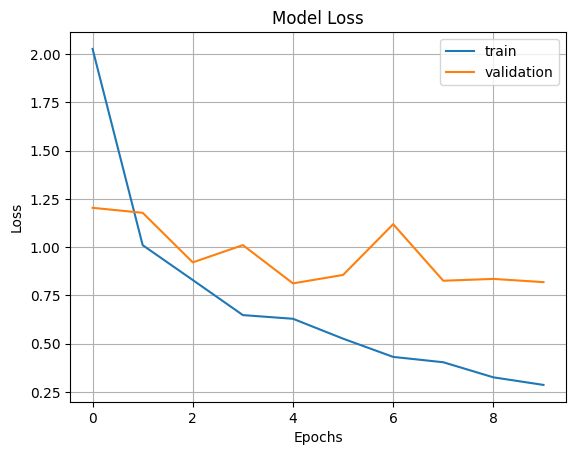

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

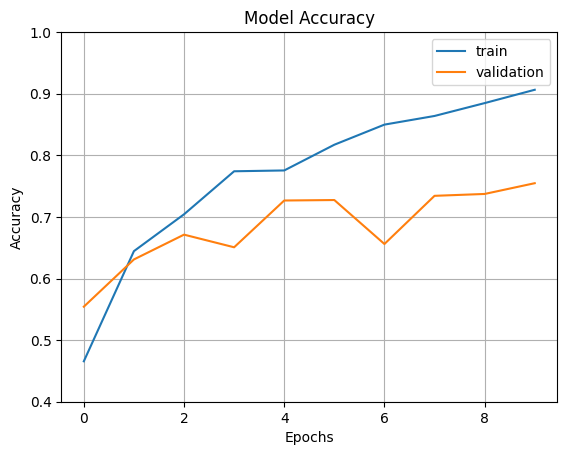

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Prediction for MobileNet

In [ ]:
import cv2
image=cv2.imread('/content/drive/MyDrive/ASE Project/Datasets/Image Classification dataset for ASE Project/Cotton Disease Dataset/PinkBollworm/22_Pink-bollworm-larvae_Winfield-Sterling.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
pred=mobnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is PinkBollworm


In [ ]:
mobnet_model.save_weights('MobileNet_model_for_Cotton_Pest.h5')


In [16]:
!wget https://github.com/oleksandr-g-rock/How_to_create-image-classification-for-recognizing-persons-animals-others/raw/main/animall_person_other_v2_fine_tuned.h5

--2023-10-23 19:11:08--  https://github.com/oleksandr-g-rock/How_to_create-image-classification-for-recognizing-persons-animals-others/raw/main/animall_person_other_v2_fine_tuned.h5
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oleksandr-g-rock/How_to_create-image-classification-for-recognizing-persons-animals-others/main/animall_person_other_v2_fine_tuned.h5 [following]
--2023-10-23 19:11:08--  https://raw.githubusercontent.com/oleksandr-g-rock/How_to_create-image-classification-for-recognizing-persons-animals-others/main/animall_person_other_v2_fine_tuned.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

In [21]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/ASE Project/Image Classification/Cotton_Pest_Detection_Model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open ("model.tflite" , "wb") .write(tflite_model)

14798932